# Phase 3 Data Science Training Notebook

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


## Exploratory Data Analysis

In [12]:
import tarfile

def extractFiles(tarFileName):
    fileObj = tarfile.open(tarFileName, "r")
    fileObj.extractall("C:\Phase3/2022-Phase-3\data-science\skeleton-code")
    fileObj.close()

In [13]:
extractFiles("cifar-10-python.tar.gz")


In [14]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [15]:
from cgi import test


batch1 = unpickle("cifar-10-batches-py/data_batch_1")
batch2 = unpickle("cifar-10-batches-py/data_batch_2")
batch3 = unpickle("cifar-10-batches-py/data_batch_3")
batch4 = unpickle("cifar-10-batches-py/data_batch_4")
batch5 = unpickle("cifar-10-batches-py/data_batch_5")
testBatch = unpickle("cifar-10-batches-py/test_batch")

testBatchData = testBatch[b'data']
print(testBatch.keys())
shapedTestBatchData = testBatchData.reshape(len(testBatchData),3,32, 32).transpose(0,2,3,1) # reshaped data into 32x32 image
print(shapedTestBatchData.shape)

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
(10000, 32, 32, 3)


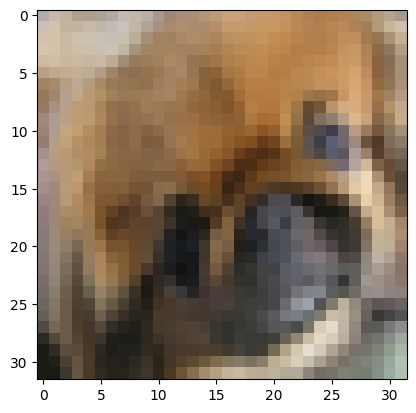

In [16]:
plt.imshow(shapedTestBatchData[2342]) # testing if data has been shaped correctly.

In [17]:
allFileNamesList = list()
allLabelsList = list()
allFileNamesList.extend(batch1[b'filenames'])
allFileNamesList.extend(batch2[b'filenames'])
allFileNamesList.extend(batch3[b'filenames'])
allFileNamesList.extend(batch4[b'filenames'])
allFileNamesList.extend(batch5[b'filenames'])
allLabelsList += batch1[b'labels']
allLabelsList += batch2[b'labels']
allLabelsList += batch3[b'labels']
allLabelsList += batch4[b'labels']
allLabelsList += batch5[b'labels']
print(len(allFileNamesList))
allDataList = np.concatenate((batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']), axis =0)
allDataList.shape


50000


(50000, 3072)

In [18]:
allShapedData = allDataList.reshape(len(allDataList),3,32,32).transpose(0,2,3,1)
allShapedData.shape


(50000, 32, 32, 3)

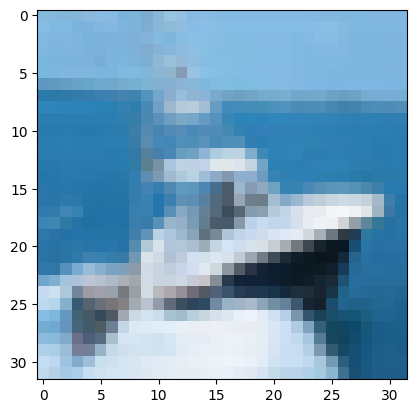

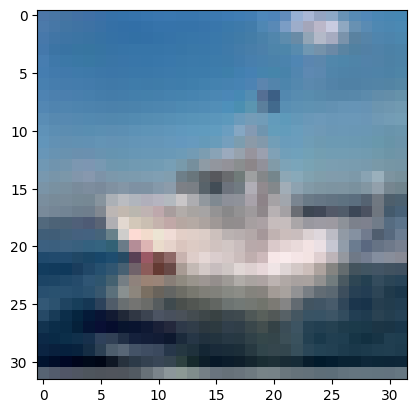

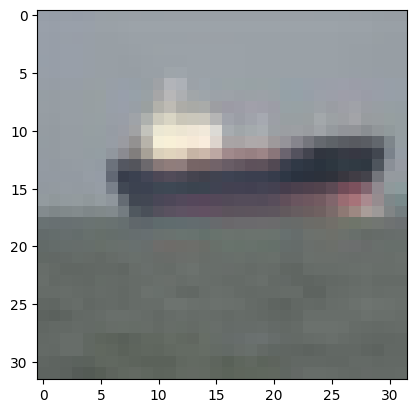

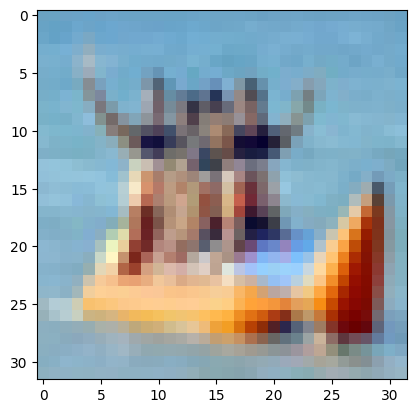

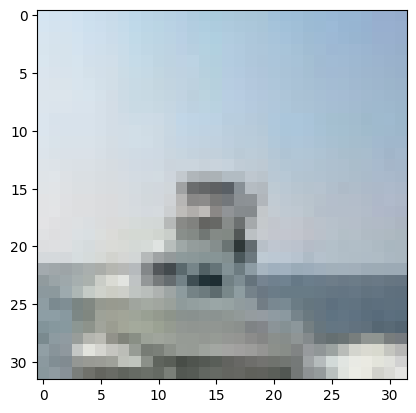

In [21]:
boat_indices = []
for j in range(len(allLabelsList)):
    if allLabelsList[j] == 8:
        boat_indices.append(j)
for i in range(0,5):
    image = allShapedData[boat_indices[i]]
    plt.imshow(image)
    plt.show()

# Data Processing

In [10]:
allShapedData = allDataList.reshape(len(allDataList),3,32,32).transpose(0,2,3,1)

train_x = allShapedData[:10000]
train_y = np.array(allLabelsList[:10000])

test_x = shapedTestBatchData[:2000]
test_y = np.array(testBatch[b'labels'][:2000])

train_x, test_x = train_x / 255.0, test_x / 255.0


# Data Modelling

In [11]:
from tensorflow import keras
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [16]:
def generateModel():
    """
    Make a Keras Sequential Model.
    Feel free to change the layout of the layers.

    Read more about keras here: https://keras.io/api/
    Tensorflow setup adapted here: https://www.tensorflow.org/tutorials/quickstart/beginner
    """
    model = Sequential(name="Image_Recognition_Model")
    model.add(Input(shape=(32,32,3))) # Input layer.

    # model.add(layers.Rescaling(scale=1./255, name="Normaliser")) # Example pre-processing layer.

    model.add(layers.Dense(2500, activation="relu")) # Example Hidden Layer 1. Has 40 Nodes.
    model.add(layers.Dense(1500, activation="relu")) # Example Hidden Layer 2. Has 25 Nodes.
    model.add(layers.Dense(250, activation="sigmoid")) # Example Hidden Layer 3. Has 15 Nodes.

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability")) # Output layer.

    # model.compile(
    #     optimizer='SGD',
    #     loss= 'sparse_categorical_crossentropy',
    #     metrics=['accuracy']
    # )
    model.compile(
        optimizer=optimizers.SGD(learning_rate=0.01),
        loss=losses.MeanAbsoluteError(),
        metrics=['accuracy']
    )

    return model

In [17]:
import os


model = generateModel()

log_dir = os.path.join(r'output\logs' , datetime.now().strftime("%Y-%m-%d-%H%M%S"))

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

model.fit(train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=5,
    batch_size=100, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    # verbose=0 # Uncomment this line to reduce the printing on console.
)

Epoch 1/5
  2/100 [..............................] - ETA: 41:55 - loss: 4.2309 - accuracy: 0.0950

In [16]:
model.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets
